#Student Name: Justin Helfman
#ECE 595 Machine Learning II
#Project 3: GAN - Student Code

In [ ]:
#Import necessary packages
import numpy as np
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam as adam
from keras.models import load_model
import matplotlib.pyplot as plt
import random
import tensorflow as tf

#Part 1: Implementing the GAN

Epoch 5000
5000: [Discriminator loss: 0.688384, acc: 0.498047]  [GAN loss: 0.425262, acc: 0.912109]


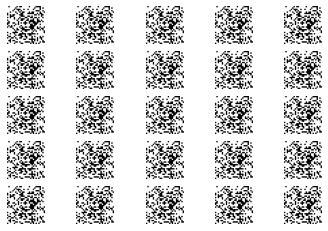

Epoch 10000
10000: [Discriminator loss: 0.688528, acc: 0.499023]  [GAN loss: 0.605586, acc: 0.739258]


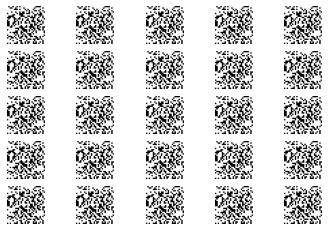

Epoch 15000
15000: [Discriminator loss: 0.688301, acc: 0.497070]  [GAN loss: 0.238840, acc: 0.992188]


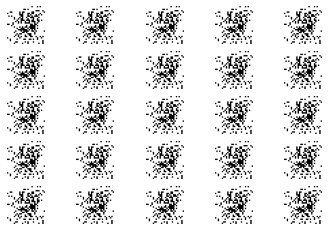

Epoch 20000
20000: [Discriminator loss: 0.687923, acc: 0.500000]  [GAN loss: 0.680343, acc: 0.581055]


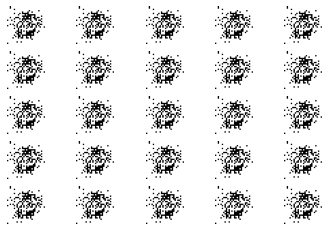

Epoch 25000
25000: [Discriminator loss: 0.688581, acc: 0.500000]  [GAN loss: 0.818245, acc: 0.018555]


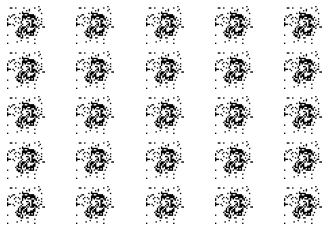

Epoch 30000
30000: [Discriminator loss: 0.687948, acc: 0.500000]  [GAN loss: 0.740389, acc: 0.218750]


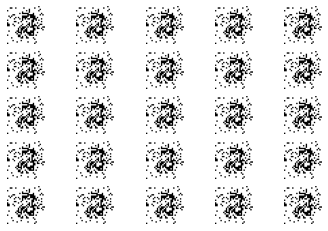

Epoch 35000
35000: [Discriminator loss: 0.688443, acc: 0.500000]  [GAN loss: 0.774792, acc: 0.000977]


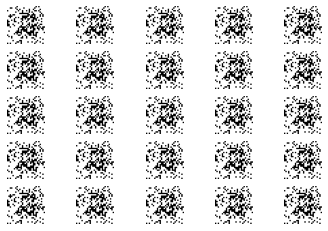

Epoch 40000
40000: [Discriminator loss: 0.687656, acc: 0.500000]  [GAN loss: 0.739210, acc: 0.076172]


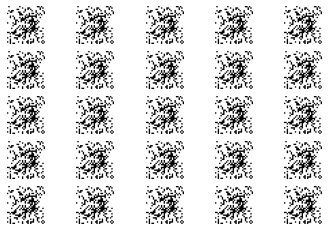

Epoch 45000
45000: [Discriminator loss: 0.688413, acc: 0.500000]  [GAN loss: 0.803332, acc: 0.007812]


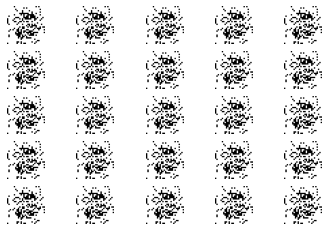

Epoch 50000
50000: [Discriminator loss: 0.687465, acc: 0.500000]  [GAN loss: 0.876051, acc: 0.000977]


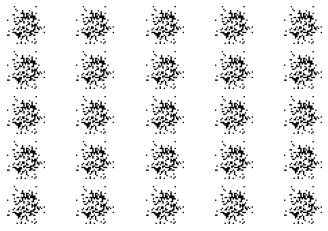

In [ ]:
#Load MNIST data and normalize to [-1, 1]
# Fill this in
(data_train, _), (data_test, _) = mnist.load_data()
data_train = (data_train/127.5) - 1
data_test = (data_test/127.5) - 1

# The D-dimensional noise vector length
latent_dim = 100

data_dim = 784

# Optimizer for discriminator, which will have a higher learning rate than adversarial model
def adam_optimizer():
    # FILL THIS IN
    return [adam(lr=0.0002, beta_1=0.5, beta_2=0.999), adam(lr=0.0001, beta_1=0.9, beta_2=0.999)] #[discriminator, GAN]

# Genrerator model
def create_generator():
    # FILL THIS IN
    generator=Sequential()
    #generator.add(Dense(100, input_dim=latent_dim)) #latent
    #generator.add(LeakyReLU(0.2))

    generator.add(Dense(250, input_dim=latent_dim)) #Input + 1st layer
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(550))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(1100))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(data_dim, activation='tanh')) #data dim

    return generator

# Discriminator model
def create_discriminator():
    # FILL THIS IN
    discriminator=Sequential()
    #discriminator.add(Dense(784))
    
    discriminator.add(Dense(1100, activation=LeakyReLU(0.2), input_dim=data_dim)) #Input + 1st layer
    discriminator.add(Dropout(0.3))
    
    discriminator.add(Dense(550, activation=LeakyReLU(0.2)))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dropout(0.3))
    discriminator.add(Dense(units=250))

    discriminator.add(Dense(units=1, activation='sigmoid'))
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer()[0], metrics=['accuracy'])

    return discriminator

# Create adversarial model
def create_gan(discriminator, generator):
    # FILL THIS IN
    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=adam_optimizer()[1], metrics=['accuracy'])

    return gan

# Creating GAN
generator = create_generator()
discriminator = create_discriminator()
gan = create_gan(discriminator, generator)

# Model and training parameters
#ASSIGN VALUES TO THE FOLLOWING VARIABLES
epochs = 50000
batch_size = 1024
sample_interval = 5000

# Array to save training history
training_meta_data = np.zeros([epochs, 4])

# Training the GAN
for e in range(1, epochs+1):

    # Generate random noise as input
    # FILL THIS IN
    noise = keras.backend.constant(np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim)))

    # Generate fake MNIST images from generated noise
    # FILL THIS IN
    fake_images = generator(noise)
    fake_images = tf.reshape(fake_images, (-1,28,28))

    # Get a random set of real MNIST images
    # FILL THIS IN
    real_images = tf.convert_to_tensor(random.choices(data_train, k=batch_size))

    # Concatenate real and fake images into a single array (or batch)
    # FILL THIS IN
    data_total = tf.cast(real_images, tf.float64) + tf.cast(fake_images, tf.float64)

    # Assign training labels (assign high probability, but not 1, to real images)
    # FILL THIS IN
    labels_real = [0.9 for i in range(batch_size//2)]

    # Allow discriminator parameters to be updated
    # FILL THIS IN
    labels_fake = [0 for i in range(batch_size//2)]

    # Train discriminator on batch of real and fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    labels_discriminator = labels_real + labels_fake
    labels_discriminator = tf.convert_to_tensor(labels_discriminator)
    discriminator.trainable = True #Where we left off...

    # Train adversarial model and try to fool discriminator (with incorrect label) 
    # by generating a new batch of noise and assign them labels of real data
    # FILL THIS IN
    data_total = tf.reshape(data_total, (-1, 784))
    d_loss = discriminator.train_on_batch(data_total, labels_discriminator)
    noise = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
    labels_generator = np.ones(batch_size)

    # Keep discriminator weights constant while training generator
    # FILL THIS IN
    discriminator.trainable = False

    # Train GAN (without updating discriminator weights) on new batch of fake images. Assign loss and accuracy to variable
    # FILL THIS IN
    gan_loss = gan.train_on_batch(noise, labels_generator)

    # Save training status
    # Discriminator and model loss
    training_meta_data[e-1, 0] = d_loss[0]
    training_meta_data[e-1, 1] = gan_loss[0]

    # Discriminator and model accuracy
    training_meta_data[e-1, 2] = d_loss[1]
    training_meta_data[e-1, 3] = gan_loss[1]


    # If at sample interval, print training status and save samples
    if e % sample_interval == 0:
      
        # Print training status
        print("Epoch %d" %e)
        log_mesg = "%d: [Discriminator loss: %f, acc: %f]" % (e, d_loss[0], d_loss[1])
        log_mesg = "%s  [GAN loss: %f, acc: %f]" % (log_mesg, gan_loss[0], gan_loss[1])
        print(log_mesg)
        
        # Plot images 
        r, c = 5, 5

        # Create images from the noise (predict the outcome of the noise)
        gen_imgs = generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow((gen_imgs[cnt].reshape(28, 28)), cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()

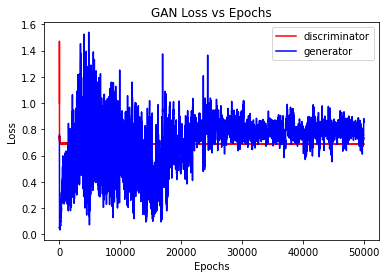

In [ ]:
# Plot model loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT

plt.plot([a[0] for a in training_meta_data], color="red", label="discriminator")
plt.plot([a[1] for a in training_meta_data], color="blue", label="generator")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("GAN Loss vs Epochs")

plt.legend(loc="best")

plt.show()

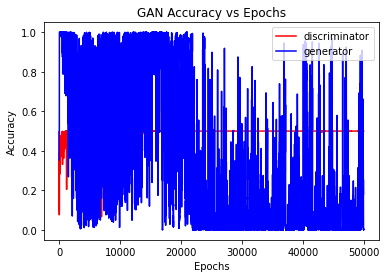

In [ ]:
# Plot accuracy vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.plot([a[2] for a in training_meta_data], color="red", label="discriminator")
plt.plot([a[3] for a in training_meta_data], color="blue", label="generator")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("GAN Accuracy vs Epochs")

plt.legend(loc="best")

plt.show()

[4]. Compare and comment on the results of GAN with dropout and without dropout.

ANS: Without dropout, the discriminator network would be too limited to knowing correct images on very specific characteristics, and with generators, these characteristics would be weighted too heavily regardless of wether or not a correct image was produced.  With dropout included, these networks are allowed to generalize more and learn how to better discriminate/generate broadly.


[5][a]. Comment on importance of hyper-parameter tuning

ANS: With hyper-parameter tuning, such as that with ADAM, we can better adjust things we know to be factors in our loss function.  As with ADAM, we were able to tune our optimizer to two settings; one for a discriminator, and one for a generator.  This tuning allows for each optimizer to be a much better fit for the given networks.


[6]. Answer the following questions:



1.   Why does the accuracy of the discriminator remain around 50%? Is this a good trait of the GAN? 

  ANS: As the GAN progresses (i.e. discriminator and generator learn), the discriminator is somewhat on pace with the level of the generator.  Because of this, the discriminator stays to become as good as the generator.  This is a somewhat desired trait, as both networks learn/imporve together.


2.   How could this model be modified to produce cleaner (less noisy) images? 

  ANS: The discriminator could be allowed to start at a slightly higher performing level.  This would allow for the discriminator to be more sensetive to this noise, which would force the generator to perform better on generating images.

#Part 2: Generating samples using trained generator

In [ ]:
# Generate ten images from Gaussian noise using the trained generator from Part 1
# FILL THIS IN
generated_images = list()

for i in range(10):
  noise = keras.backend.constant(np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim)))
  generated_images.append(generator(noise))

generated_images = tf.convert_to_tensor(generated_images)
# Re-scale generated images to lie in [0, 1]
# FILL THIS IN
generated_images = np.array((generated_images + 1) / 2)

noise = np.array(noise)

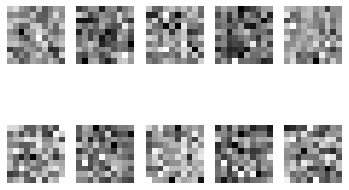

In [ ]:
# Visualize generated noise
r, c = 2, 5
fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow((noise[cnt].reshape(10, 10)), cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

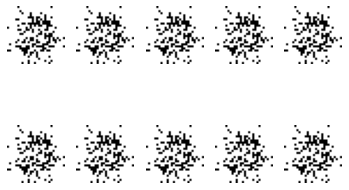

In [ ]:
# Visualize generated samples
r, c = 2, 5
fig, axs = plt.subplots(r, c)
cnt = 0
for i in range(r):
    for j in range(c):
        axs[i,j].imshow((generated_images[cnt][0].reshape(28, 28)), cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

#Part 3: Testing accuracy of generated images on ten samples

In [ ]:
# Load mnist classifier and generated images
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')
#MNIST_RAW = pd.read_csv('/content/drive/My Drive/ECE 595/Assignment 3/mnist_classifier.h5')

mnist_classifier = load_model('/content/drive/My Drive/ECE 595/Assignment 3/mnist_classifier.h5')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ASSIGN CLASSES
labels = []
from keras.utils import to_categorical

# Convert integer labels to one-hot labels 
labels = keras.utils.to_categorical(labels, num_classes=10)

classifications = []

# Show classifications
# FILL THIS IN 
print("Classifications: ")
for i in range(len(generated_images)):
  classifications.append(mnist_classifier.test_on_batch(generated_images[i]))
  print(f'{i}: {classifications[i][0]}')

# Evaluate accuracy
# FILL THIS IN 
print("Accuracy: ")
for i in range(len(generated_images)):
  print(f'{i}: {classifications[i][1]}')

Classifications: 
0: 0.0
1: 0.0
2: 0.0
3: 0.0
4: 0.0
5: 0.0
6: 0.0
7: 0.0
8: 0.0
9: 0.0
Accuracy: 
0: 0.0
1: 0.0
2: 0.0
3: 0.0
4: 0.0
5: 0.0
6: 0.0
7: 0.0
8: 0.0
9: 0.0


[3a] State the accuracy of the classifier on your ten generated images.  Based on this accuracy, would you say your generator does well in producing images comparable to those in the MNIST dataset of hand-written digits?  Why or why not?:

ANS: As seen in parts 1 and 2 I believe I had some complicaated issues relating to my generator that I had issues in trying to solve.  Of course because of this, I would say that my network was definetly not a well performer in producing images comprable to the MNIST set.


[3b] In this project, we only tested the performance of the pre-trained classifier on ten samples and used its result to determine the robustness of the generator.  How could we better assess the quality of the generated images using this pre-trained classifier and the saved generator?:

ANS: We could try on a much larger scale (with many epochs) to try and train the generator network in an attempt to have it learn and to beat the much more sensetive pre-trained classifier.